## Composit Kernel for HMF:

Let's see if this improves the LOOCV:

### $K_L = RBF + RBF$

summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5


summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  loading from HF_h

2025-09-26 11:31:24.604447: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


HMF-MFCoregEmu | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  Will save to /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train_l10_comp_kernel/hmf_emu_combined_z2.5_inducing_500_latents_10_leave31.pkl
HMF-MFCoregEmu | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  Will save to /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train_l10_comp_kernel/hmf_emu_combined_z2.5_inducing_500_latents_10_leave31.pkl
HMF-MFCoregEmu | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  Loading model from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train_l10_comp_kernel/hmf_emu_combined_z2.5_inducing_500_latents_10_leave31.pkl
HMF-MFCoregEmu | 09/26/2025 11:31:24 AM | Rank 0 | INFO  |  Loading model from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train_l10_comp_kernel/hmf_emu_combined_z2.5_inducing_500_latents_10_leave31.pkl
HMF-MFCoregEmu | 09/26/2025 11:31:25 AM | Rank 0 | INFO  |  Built the model with
HMF-MFCoregEmu | 09/26/2025 11:31:25 AM | Rank 0 | INFO  |  Built the model with
HMF-MFCoregEmu | 09/26/2025 11:31:25 AM | Rank 0 | INFO  |

Text(0.5, 1.0, 'KL History')

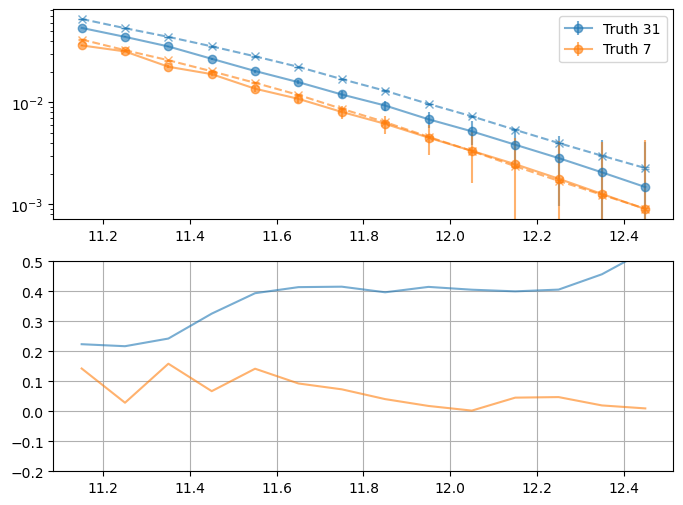

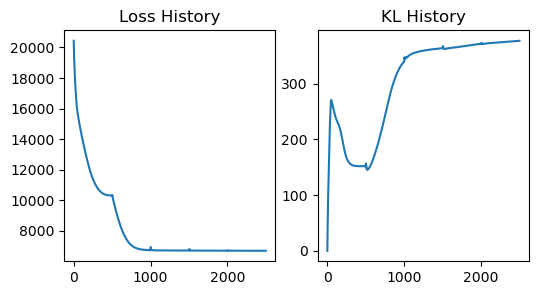

In [2]:
from gal_goku import emus_multifid
import numpy as np
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'
train_subdir = 'HMF/train_l10_comp_kernel'
num_inducing = 500
num_latents = 10
z=2.5
emu = emus_multifid.HmfNativeBins(data_dir=data_dir, z=z, num_latents=num_latents, 
                                    num_inducing=num_inducing, logging_level='INFO')
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,1,figsize=(8, 6))

ind_test = 31
mf = f'hmf_emu_combined_z2.5_inducing_500_latents_10_leave{ind_test}.pkl'


for c, i in enumerate([ind_test, 7]):
    mean_pred, err_pred = emu.predict(ind_test=np.array([i]), 
                                      train_subdir=train_subdir, 
                                      model_file=mf,
                                      composite_kernel='rbf')
    truth = emu.Y[1][i]
    truth_err = emu.Y_err[1][i]
    mean_pred = 10**mean_pred
    err_pred = mean_pred * np.log(10) * err_pred
    truth = 10**truth
    ax[0].errorbar(emu.mbins, mean_pred.numpy().squeeze(), yerr=err_pred.numpy().squeeze(), fmt='--x', capsize=3, alpha=0.6, color=f'C{c}')
    ax[0].errorbar(emu.mbins, truth, yerr=truth_err.squeeze(), fmt='-o', alpha=0.6, color=f'C{c}', label=f'Truth {i}')
    ax[1].plot(emu.mbins, np.abs(mean_pred.numpy().squeeze()/truth - 1), alpha=0.6, color=f'C{c}')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].grid()
ax[1].set_ylim(-.2, 0.5)

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(emu.model_attrs['loss_history'])
ax[0].set_title('Loss History')
ax[1].plot(emu.model_attrs['kl_history'])
ax[1].set_title('KL History')


In [4]:
emu.emu

name,class,transform,prior,trainable,shape,dtype,value
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.4838531596153603
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[0].lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[0.45982483, 2.52122, 1.13389..."
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.4838531596145683
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[1].lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[0.45982483, 2.52122, 1.13389..."
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_delta.variance,Parameter,Softplus,,True,(),float64,2.12443
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_delta.lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[3.20918, 3.26896, 3.4222..."
LatentMFCoregionalizationSVGP.kernel.kernels[0].rho,Parameter,Softplus,,True,"(1, 1)",float64,[[1.86651]]
LatentMFCoregionalizationSVGP.kernel.kernels[1].kernel_L.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.9395924522320943
LatentMFCoregionalizationSVGP.kernel.kernels[1].kernel_L.kernels[0].lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[2.67107, 3.08095, 1.04269..."
LatentMFCoregionalizationSVGP.kernel.kernels[1].kernel_L.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.9395924522320951


## $K_L = RBF + Matern52$

In [ ]:
from gal_goku import emus_multifid
import numpy as np
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'
train_subdir = 'HMF/train_l10_comp_Matern52'
num_inducing = 500
num_latents = 10
z=2.5
emu = emus_multifid.HmfNativeBins(data_dir=data_dir, z=z, num_latents=num_latents, 
                                    num_inducing=num_inducing, logging_level='INFO')

from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,1,figsize=(8, 6))

# Just checking the test on ind_train is good:
sample_train = 12

ind_test = 31
mf= f'hmf_emu_combined_z2.5_inducing_500_latents_10_leave{ind_test}.pkl'


for c, i in enumerate([ind_test, sample_train]):
    mean_pred, err_pred = emu.predict(ind_test=np.array([i]), 
                                      train_subdir=train_subdir, 
                                      model_file=mf,
                                      composite_kernel='rbf')
    truth = emu.Y[1][i]
    err_truth = emu.Y_err[1][i]
    truth = 10**truth
    mean_pred = 10**mean_pred
    err_truth = truth * np.log(10) * err_truth
    err_pred = mean_pred * np.log(10) * err_pred
    
    ax[0].errorbar(emu.mbins, mean_pred.numpy().squeeze(), yerr=err_pred.numpy().squeeze(), fmt='--x', capsize=3, alpha=0.6, color=f'C{c}')
    ax[0].errorbar(emu.mbins, truth, yerr=err_truth.squeeze(), fmt='-o', alpha=0.6, color=f'C{c}', label=f'Truth {i}')
    ax[1].plot(emu.mbins, np.abs(mean_pred.numpy().squeeze()/truth - 1), alpha=0.6, color=f'C{c}')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].grid()
ax[1].set_ylim(-.2, 0.5)

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(emu.model_attrs['loss_history'])
ax[0].set_title('Loss History')
ax[1].plot(emu.model_attrs['kl_history'])
ax[1].set_title('KL History')


fig, ax = plt.subplots(2,1,figsize=(8, 6))
ind_test = 25
mf= f'hmf_emu_combined_z2.5_inducing_500_latents_10_leave{ind_test}.pkl'



for c, i in enumerate([ind_test, sample_train]):
    mean_pred, err_pred = emu.predict(ind_test=np.array([i]), 
                                      train_subdir=train_subdir, 
                                      model_file=mf,
                                      composite_kernel='rbf')
    truth = emu.Y[1][i]
    err_truth = emu.Y_err[1][i]
    truth = 10**truth
    mean_pred = 10**mean_pred
    err_truth = truth * np.log(10) * err_truth
    err_pred = mean_pred * np.log(10) * err_pred
    
    ax[0].errorbar(emu.mbins, mean_pred.numpy().squeeze(), yerr=err_pred.numpy().squeeze(), fmt='--x', capsize=3, alpha=0.6, color=f'C{c}')
    ax[0].errorbar(emu.mbins, truth, yerr=err_truth.squeeze(), fmt='-o', alpha=0.6, color=f'C{c}', label=f'Truth {i}')
    ax[1].plot(emu.mbins, np.abs(mean_pred.numpy().squeeze()/truth - 1), alpha=0.6, color=f'C{c}')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].grid()
ax[1].set_ylim(-.2, 0.5)

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(emu.model_attrs['loss_history'])
ax[0].set_title('Loss History')
ax[1].plot(emu.model_attrs['kl_history'])
ax[1].set_title('KL History')



fig, ax = plt.subplots(2,1,figsize=(8, 6))
ind_test = 16
mf= f'hmf_emu_combined_z2.5_inducing_500_latents_10_leave{ind_test}.pkl'



for c, i in enumerate([ind_test, sample_train]):
    mean_pred, err_pred = emu.predict(ind_test=np.array([i]), 
                                      train_subdir=train_subdir, 
                                      model_file=mf,
                                      composite_kernel='rbf')
    truth = emu.Y[1][i]
    err_truth = emu.Y_err[1][i]
    truth = 10**truth
    mean_pred = 10**mean_pred
    err_truth = truth * np.log(10) * err_truth
    err_pred = mean_pred * np.log(10) * err_pred
    
    ax[0].errorbar(emu.mbins, mean_pred.numpy().squeeze(), yerr=err_pred.numpy().squeeze(), fmt='--x', capsize=3, alpha=0.6, color=f'C{c}')
    ax[0].errorbar(emu.mbins, truth, yerr=err_truth.squeeze(), fmt='-o', alpha=0.6, color=f'C{c}', label=f'Truth {i}')
    ax[1].plot(emu.mbins, np.abs(mean_pred.numpy().squeeze()/truth - 1), alpha=0.6, color=f'C{c}')
ax[0].set_yscale('log')
ax[0].legend()
ax[1].grid()
ax[1].set_ylim(-.2, 0.5)

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(emu.model_attrs['loss_history'])
ax[0].set_title('Loss History')
ax[1].plot(emu.model_attrs['kl_history'])
ax[1].set_title('KL History')


summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5


summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_narrow_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from HF_hmfs_2.5_no_merge.hdf5
summary_stats | 09/26/2025 03:07:53 PM | Rank 0 | INFO  |  loading from HF_h

In [2]:
emu.emu

name,class,transform,prior,trainable,shape,dtype,value
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.5880834164210454
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[0].lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[0.3937259, 2.22833, 1.1375..."
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.3651007664502
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_L.kernels[1].lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[1.03, 3.37229, 1.49427..."
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_delta.variance,Parameter,Softplus,,True,(),float64,2.31531
LatentMFCoregionalizationSVGP.kernel.kernels[0].kernel_delta.lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[3.09144, 3.10875, 3.48373..."
LatentMFCoregionalizationSVGP.kernel.kernels[0].rho,Parameter,Softplus,,True,"(1, 1)",float64,[[1.84462]]
LatentMFCoregionalizationSVGP.kernel.kernels[1].kernel_L.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.7522580440280899
LatentMFCoregionalizationSVGP.kernel.kernels[1].kernel_L.kernels[0].lengthscales,Parameter,Softplus,,True,"(10,)",float64,"[1.30111, 2.0882, 1.88016..."
LatentMFCoregionalizationSVGP.kernel.kernels[1].kernel_L.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.6443764995236021
